In [1]:
import sys
sys.path.append('/Users/echry/Documents/PhD/PhD_Arta/PhD_Structure_Folders/Field_Lab_work_data/Παρακολούθηση_Observation/Aκόρεστη ζώνη/Spatial TDR/TDR100')



from Model import Todoroff
from ModelPlotter import TodoroffPlotter



In [2]:
#Εισαγωγή της συμβολοσειράς με το .csv αρχείο των μετρήσεων TDR (Campbell TDR 100)

td=Todoroff('Data/dry_sand.csv') #πείραμα μετρήσεων σε ξηρή άμμο

In [3]:
#Κλήση της κλάσης ModelPlotter χρησιμοποιώντας την κλαση Model

plotter=TodoroffPlotter(td)

In [4]:
#Εξαγωγή των επιμέρους στοιχείων της tuple με την χρονικής στιγμή της μέτρησης (timestamp), την ταχύτητα διάδοσης
#του σήματος (Vp), τον αριθμό των κυματομορφών μέσω των οποίων λήφθηκε η μέση τιμή (WaveAvg), τον αριθμό των σημείων κάθε κυματομορφής (points),
#το εύρος μέτρησης (windowlen), το μήκος του ομοαξονικού καλωδίου (cablelen), το μήκος του κυματοδηγού (probelen) και τις κυματομορφές κάθε χρονικής
#στιγμής μέτρησης

timestamp, Vp, WaveAvg, points, cablelen, windowlen, probelen, measurements=td.import_csv()

In [5]:
#Εξαγωγή των επιμέρους στοιχείων της tuple με την απόσταση σε m. των τιμών της κυματομορφής (WaveformApparentDistance), τον χρόνο σε ns των τιμών
#της κυματομορφής (WaveformResponseTime), την κρουστική απόκριση (ImpulseResponse) και την πρώτη στήλη του προσπίπτοντος σήματος (VDown)
WaveformApparentDistance, WaveformResponseTime, ImpulseResponse, VDown= td.impulse_response()

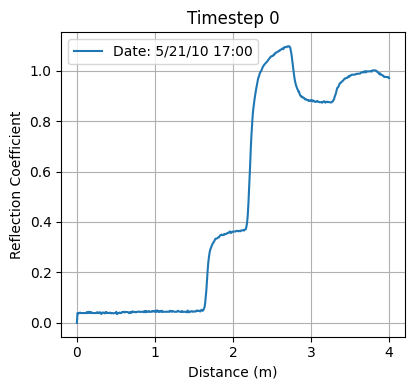

In [6]:
#Απεικόνιση του συντελεστή ανάκλασης σε σχέση με την απόσταση για την πρώτη χρονική μέτρηση

plotter.plot_reflcoefappdist(timesteps=[0])

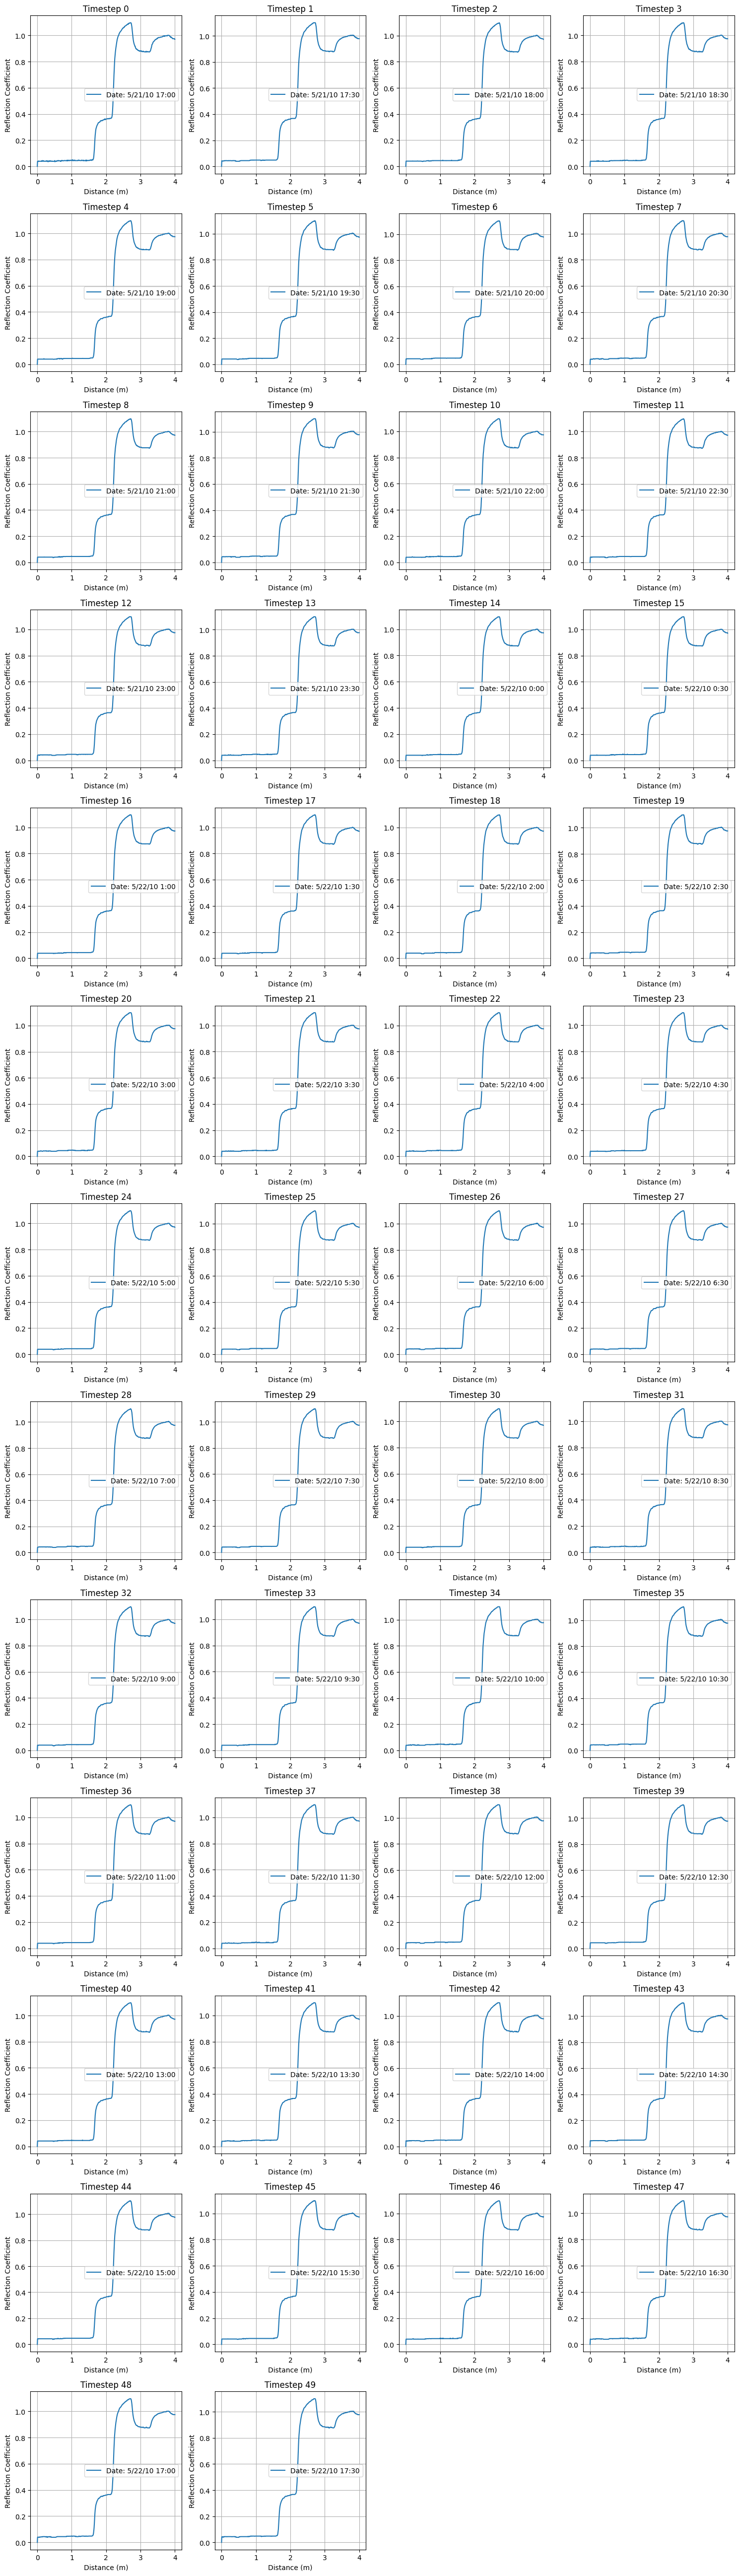

In [7]:
#Απεικόνιση του συντελεστή ανάκλασης σε σχέση με την χρόνο για όλες τις χρονικές μετρήσεις

plotter.plot_reflcoefappdist(timesteps=None)

In [8]:
#Εξαγωγή των επιμέρους στοιχείων της tuple με τα τμήματα του κυματοδηγού (Segments), την πρώτη παράγωγο των τιμών της κυματομορφής (dy_dt),
#την δεύτερη παράγωγο των τιμών της κυματομορφής (dy_dt_2), την μετατοπισμένη παράγωγο των τιμών της κυματομορφής (dy_dt_alt) και την λίστα (list)
#των 20 μεγαλύτερων τοπικών μέγιστων με βάση την πρώτη παράγωγο των τιμών της κυματομορφής

Segments,dy_dt, dy_dt2, dy_dt_alt, peak_indices=td.Selectstartendprobe()

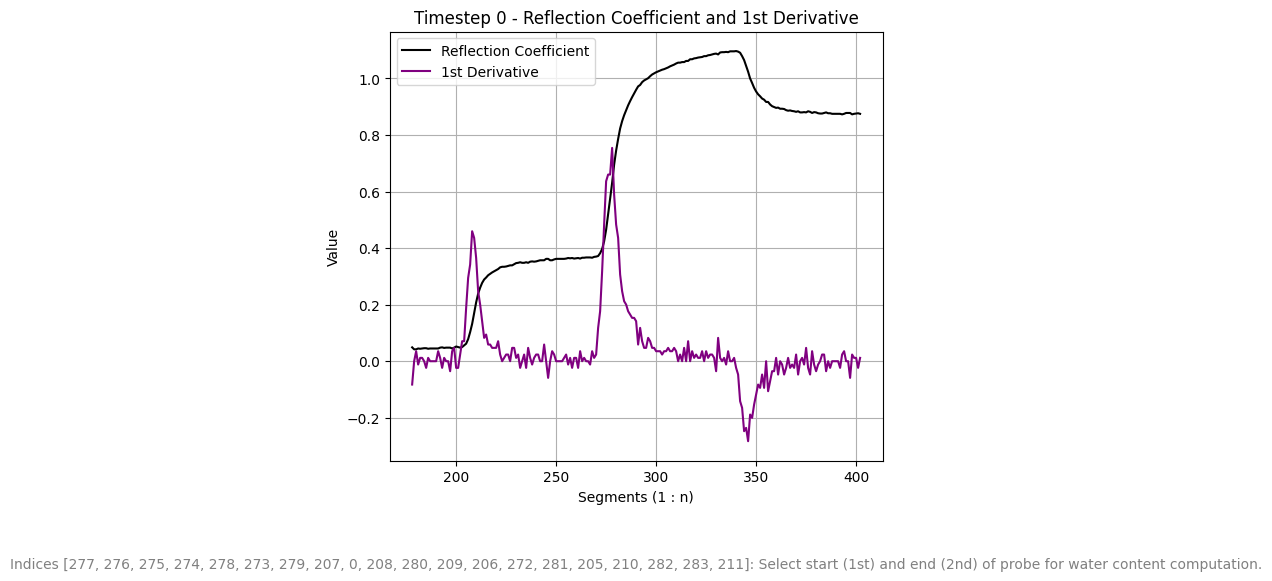

In [9]:
#Απεικόνιση του γραφήματος του συντελεστή ανάκλασης με την πρώτη παράγωγο για την επιλογή του αρχικού και του τελικού σημείου του κυματοδηγού
#Στο κάτω μέρος του σχήματος αποτυπώνονται τα 20 μεγαλύτερα τοπικά μέγιστα για την επιλογή του αρχικού κια τελικού σημείου του κυματοδηγού

plotter.plot_startendprobe(timesteps=[0]) #Για την πρώτη χρονική στιγμή μέτρησης

#Στην συγκεκριμένη περίπτωση το αρχικό σημείο είναι στο τμήμα 208 του συστήματος ομοαξονικού καλωδίου και κυματοδηγού και του το τελικό σημείο
#στο τμήμα 277 του συστήματος ομοαξονικού καλωδίου και κυματοδηγού.

In [10]:
#Εξαγωγή των επιμέρους στοιχείων της tuple με την κρουστική απόκριση σε κάθε τμήμα (segment) του κυματοδηγού (Segmentreflcoef),
#την βηματική απόκριση του συστήματος σε κάθε τμήμα του κυματοδηγού (original_values), στο προσπίπτον σήμα (VDown) και στο ανακλώμενο
#σήμα (Vup)

Segmentreflcoef, original_values, VDown, Vup=td.forwardmodel()

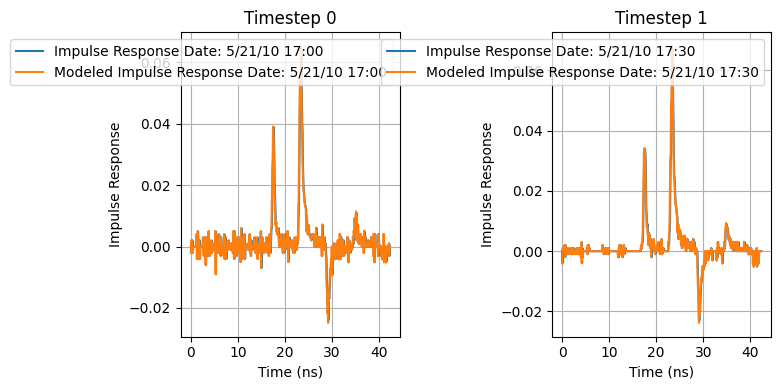

In [11]:
#Απεικόνιση της συσχέτισης μεταξύ της μετρημένης από το όργανο κρουστικής απόκρισης και της προσομοιωμένης μέσω του 
#μοντέλου Todoroff για τις δύο πρώτες χρονικές στιγμές μέτρησης

plotter.plot_modelvsimpulse(timesteps=[0,1])

In [12]:
#Εξαγωγή των επιμέρους στοιχείων της tuple της σύνθετης αντίστασης (εμπέδησης - Impendance), της διηλεκτικής σταθεράς στην κατατομή (profile)
#του κυματοδηγού και του υπολογισμένου μήκους του κυματοδηγού

Impendance, Ka, lenact=td.inversemodel(idxfirst=208,idxsec=277)

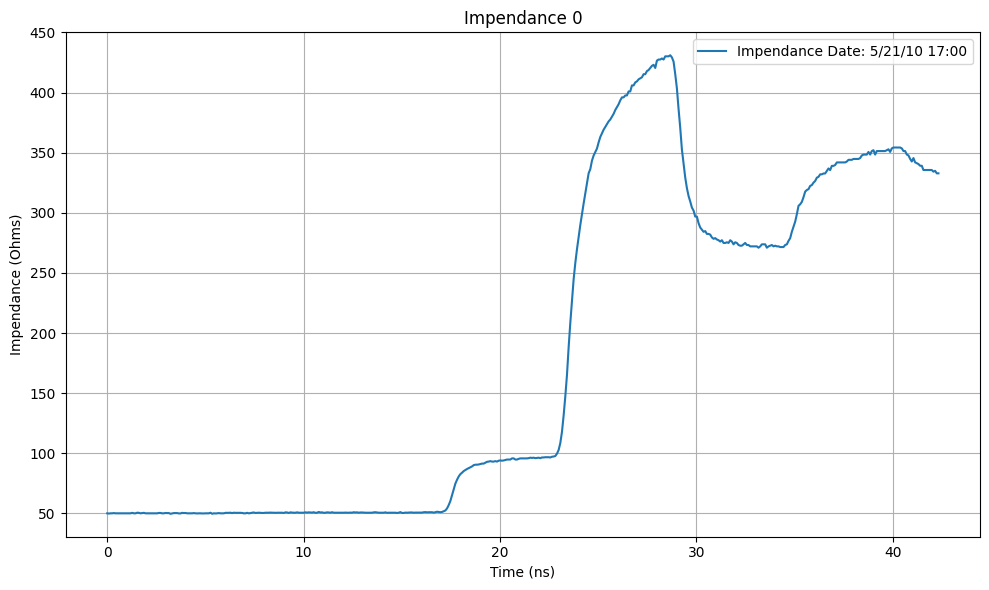

In [13]:
#Απεικόνιση της σύνθετης αντίστασης για την πρώτη χρονική στιγμή μέτρησης

plotter.plot_Impendance(timesteps=[0], idxfirst=208, idxsec=277)

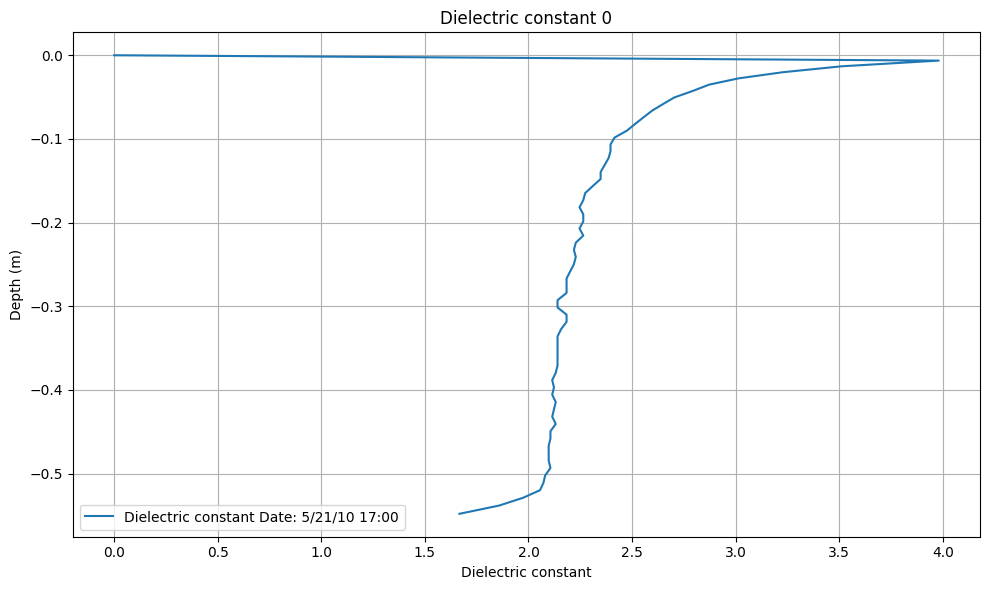

In [14]:
#Απεικόνιση της διηλεκτρικής σταθεράς στην κατατομή (profile) του μήκους του κυματοδηγού

plotter.plot_DielectricConstant(timesteps=[0], idxfirst=208, idxsec=277)